In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/googledata.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design


In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(8276, 15)

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(8276, 15)

In [11]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Rating,Reviews,Size,Installs,Price
count,8276.000000,8276.000000,8276.000000,8.276000e+03,8276.000000,8.276000e+03,8276.000000
mean,4137.500000,4560.609957,4.175121,2.803270e+05,18.897761,9.658206e+06,1.028758
std,2389.219747,2560.879748,0.534762,2.096170e+06,22.376521,5.986505e+07,16.776622
min,0.000000,0.000000,1.000000,1.000000e+00,0.008300,1.000000e+00,0.000000
25%,2068.750000,2459.750000,4.000000,1.290000e+02,2.800000,1.000000e+04,0.000000
50%,4137.500000,4613.500000,4.300000,3.213500e+03,9.500000,1.000000e+05,0.000000
75%,6206.250000,6765.250000,4.500000,4.627800e+04,27.000000,1.000000e+06,0.000000
max,8275.000000,8916.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [12]:
df.sort_values(by=['Rating'], ascending=False).head()

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
4080,4080,4554,AJ Gray Dark Icon Pack,Personalization,5.0,2,35.0,10,Paid,0.99,Others,"April 29, 2018",1.1,4.1,Personalization
5507,5507,6029,CD CHOICE TUBE,Family,5.0,10,5.8,500,Free,0.00,Others,"July 23, 2017",0.0.4,4.1,Entertainment
7168,7168,7763,EG India,Lifestyle,5.0,3,4.0,100,Free,0.00,Others,"July 29, 2018",1.1.3,4.0.3,Lifestyle
5520,5520,6042,CE Smart,Tools,5.0,3,29.0,100,Free,0.00,Others,"May 28, 2018",2.2.0,4.1,Tools
5526,5526,6048,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1,27.0,100,Paid,4.99,Others,"March 28, 2018",1.5.2,4.1,Education


In [13]:
df.shape

(8276, 15)

In [14]:
df.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
App                     object
Category                object
Rating                 float64
Reviews                  int64
Size                   float64
Installs                 int64
Type                    object
Price                  float64
Content Rating          object
Last Updated            object
Current Ver             object
Minimum Android Ver     object
Genres                  object
dtype: object

In [15]:
df.isnull().sum()

Unnamed: 0.1             0
Unnamed: 0               0
App                      0
Category                 0
Rating                   0
Reviews                  0
Size                     0
Installs                 0
Type                     0
Price                    0
Content Rating         361
Last Updated             0
Current Ver              0
Minimum Android Ver      0
Genres                   0
dtype: int64

In [16]:
df_no_nan = df.dropna(axis=0, subset=['Content Rating'])

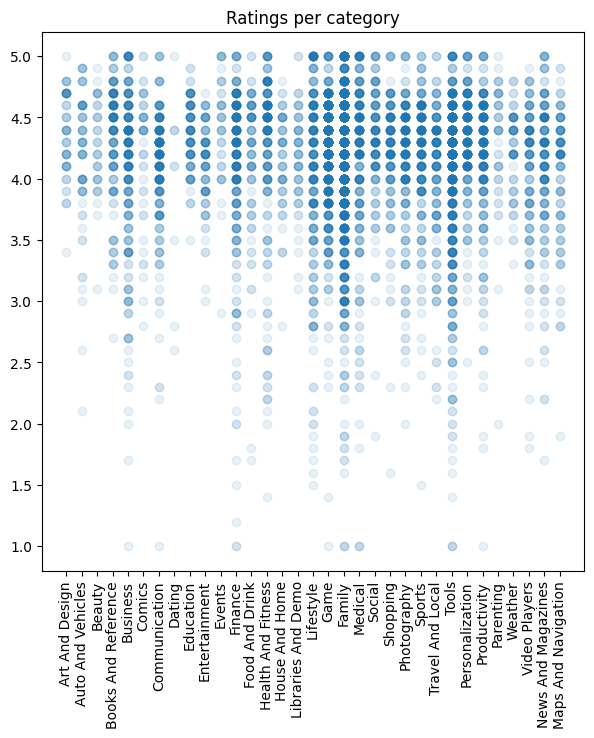

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(df_no_nan['Category'], df_no_nan['Rating'], alpha =.1);
plt.title('Ratings per category');
plt.xticks(rotation = 90);

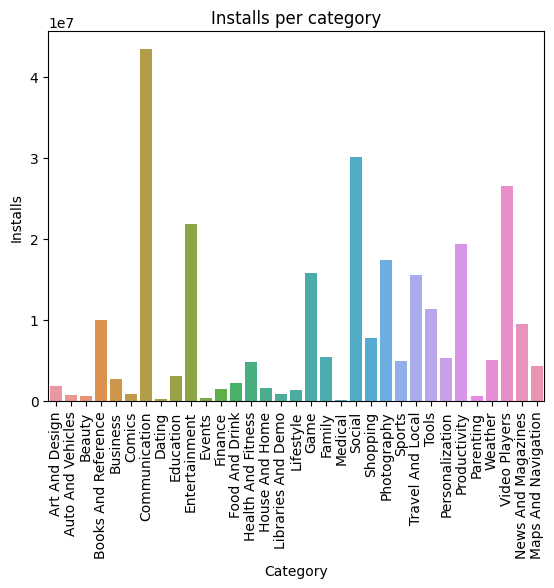

In [26]:
sns.barplot(x='Category', y='Installs', data=df_no_nan, errorbar = None);
plt.title('Installs per category');
plt.xticks(rotation = 90);

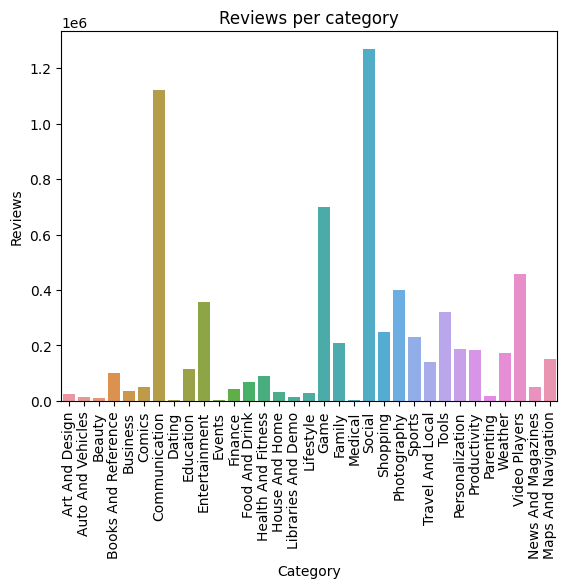

In [28]:
df_no_nan['Reviews'] = df_no_nan['Reviews'].astype('float64')

sns.barplot(x='Category', y='Reviews', data=df_no_nan, errorbar = None);
plt.title('Reviews per category');
plt.xticks(rotation = 90);

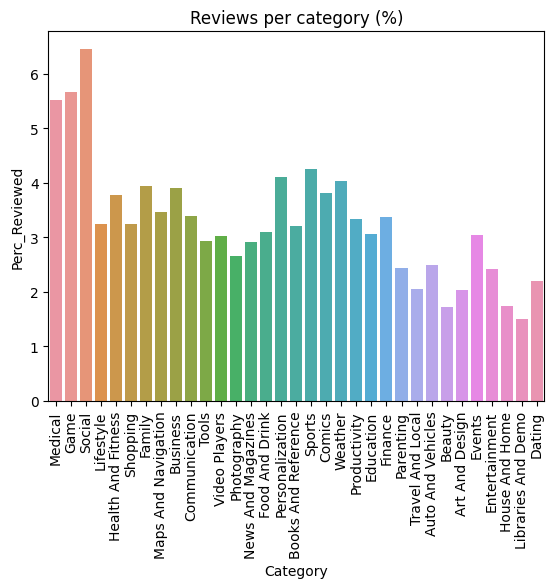

In [30]:
df_no_nan['Perc_Reviewed'] = df_no_nan['Reviews']/df_no_nan['Installs']*100;
sns.barplot(x='Category', y='Perc_Reviewed', data=df_no_nan.sort_values(by='Perc_Reviewed', ascending=False), errorbar = None);
plt.title('Reviews per category (%)');
plt.xticks(rotation = 90);

In [31]:
df_number_per_category = df_no_nan.groupby('Category')['App'].nunique()
df_number_per_category = df_number_per_category.to_frame()
df_number_per_category['Category'] = df_number_per_category.index
df_number_per_category.columns=['Count', 'Category']
df_number_per_category['Percentage'] = df_number_per_category['Count']/df_number_per_category.shape[0]
df_number_per_category.sort_values(by='Percentage', ascending=False).head(10)

,Count,Category,Percentage
Category,,,
Family,1639,Family,49.666667
Game,848,Game,25.696970
Tools,717,Tools,21.727273
Finance,302,Finance,9.151515
Productivity,300,Productivity,9.090909
Lifestyle,292,Lifestyle,8.848485
Personalization,288,Personalization,8.727273
Medical,287,Medical,8.696970
Business,263,Business,7.969697


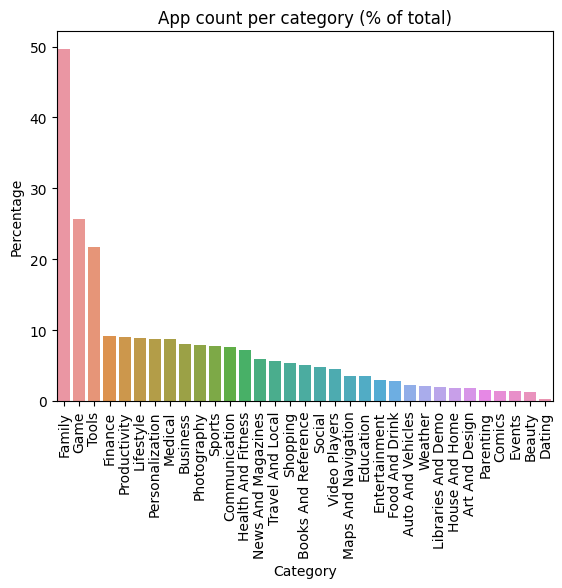

In [33]:
sns.barplot(x='Category', y='Percentage', data=df_number_per_category.sort_values(by='Percentage', ascending=False), errorbar = None);
plt.title('App count per category (% of total)');
plt.xticks(rotation = 90);

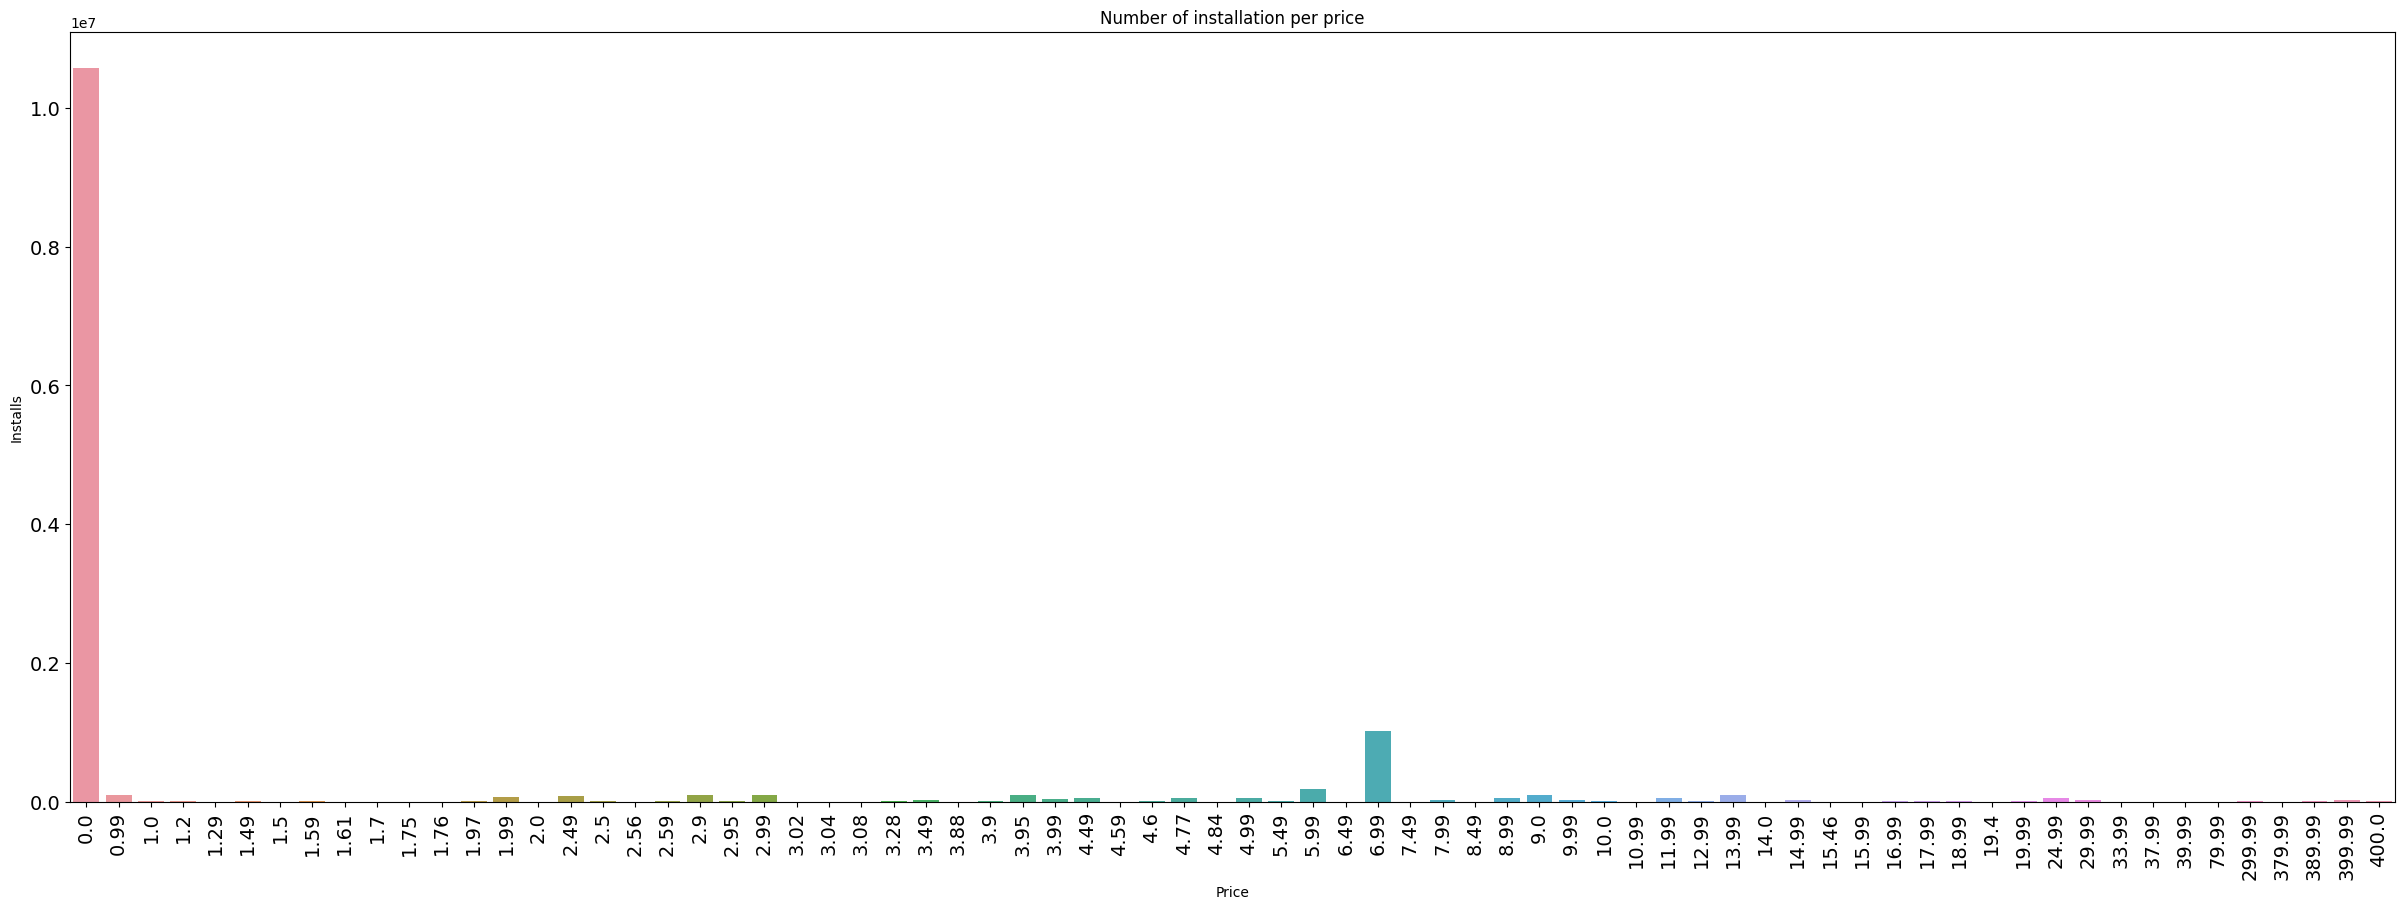

In [35]:

df_no_nan['Price'] = df_no_nan['Price'].astype('float64')
plt.figure(figsize=(30, 10))
plt.title('Number of installation per price');
plt.xticks(rotation = 90, fontsize=14);
plt.yticks(fontsize=14);
sns.barplot(x='Price', y='Installs', data=df_no_nan, errorbar = None);

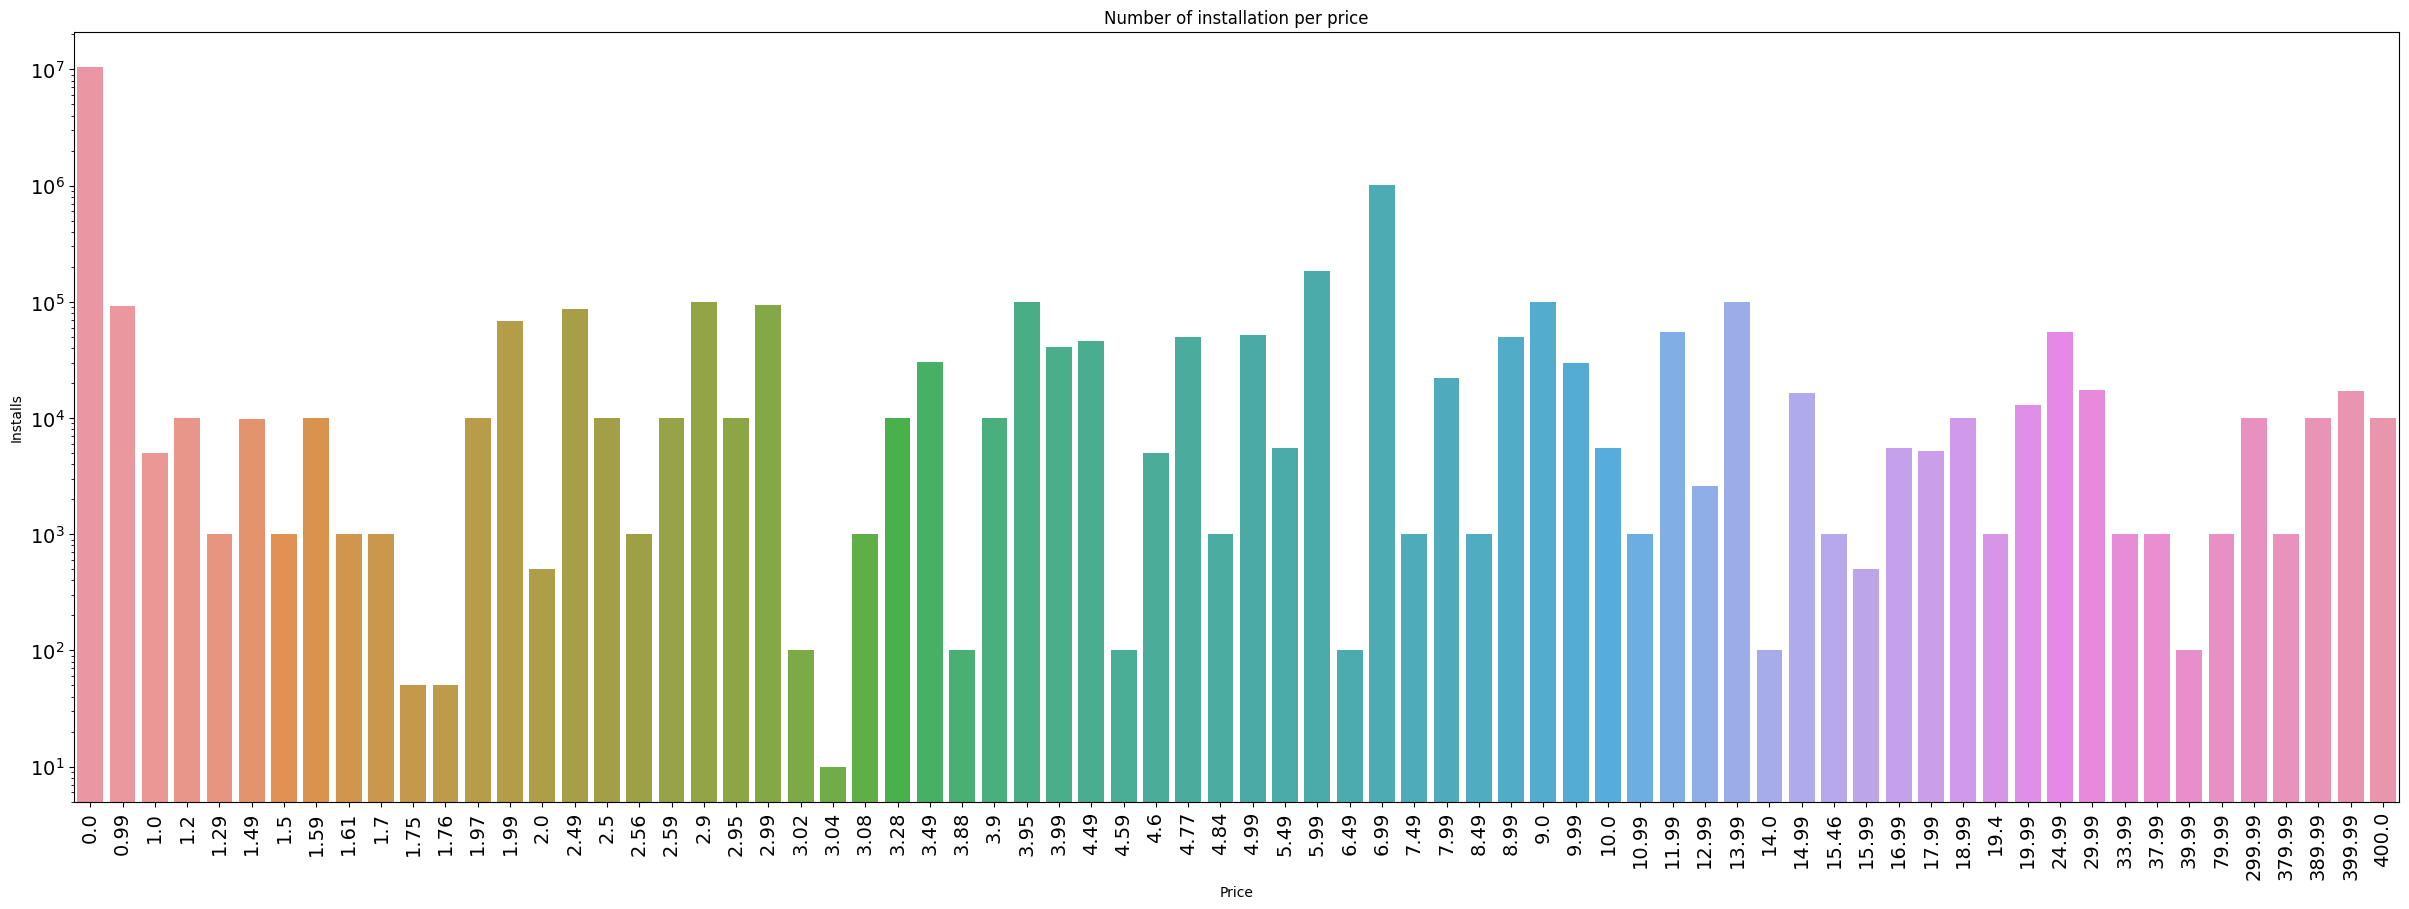

In [36]:
plt.figure(figsize=(30, 10))
plt.title('Number of installation per price');
plt.xticks(rotation = 90, fontsize=14);
plt.yticks(fontsize=14);
plt.yscale('log')
sns.barplot(x='Price', y='Installs', data=df_no_nan, errorbar = None);

In [39]:
df_no_nan['cumul_Installs_per_price'] = df_no_nan.groupby(['Price'])['Installs'].apply(lambda x: x.cumsum())
df_no_nan_cumsum = df_no_nan.groupby(['Price']).agg({'cumul_Installs_per_price': 'sum'})
df_no_nan_cumsum['percentage']=df_no_nan_cumsum['cumul_Installs_per_price']/df_no_nan_cumsum['cumul_Installs_per_price'].sum()*100
df_no_nan_cumsum.sort_values(by='percentage', ascending = False).head()

<ipython-input-39-b68a717ab177>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_no_nan['cumul_Installs_per_price'] = df_no_nan.groupby(['Price'])['Installs'].apply(lambda x: x.cumsum())


,cumul_Installs_per_price,percentage
Price,,
0.00,402635543245655,99.999680
2.99,461277110,0.000115
0.99,414551991,0.000103
1.99,99931500,0.000025
4.99,99747920,0.000025


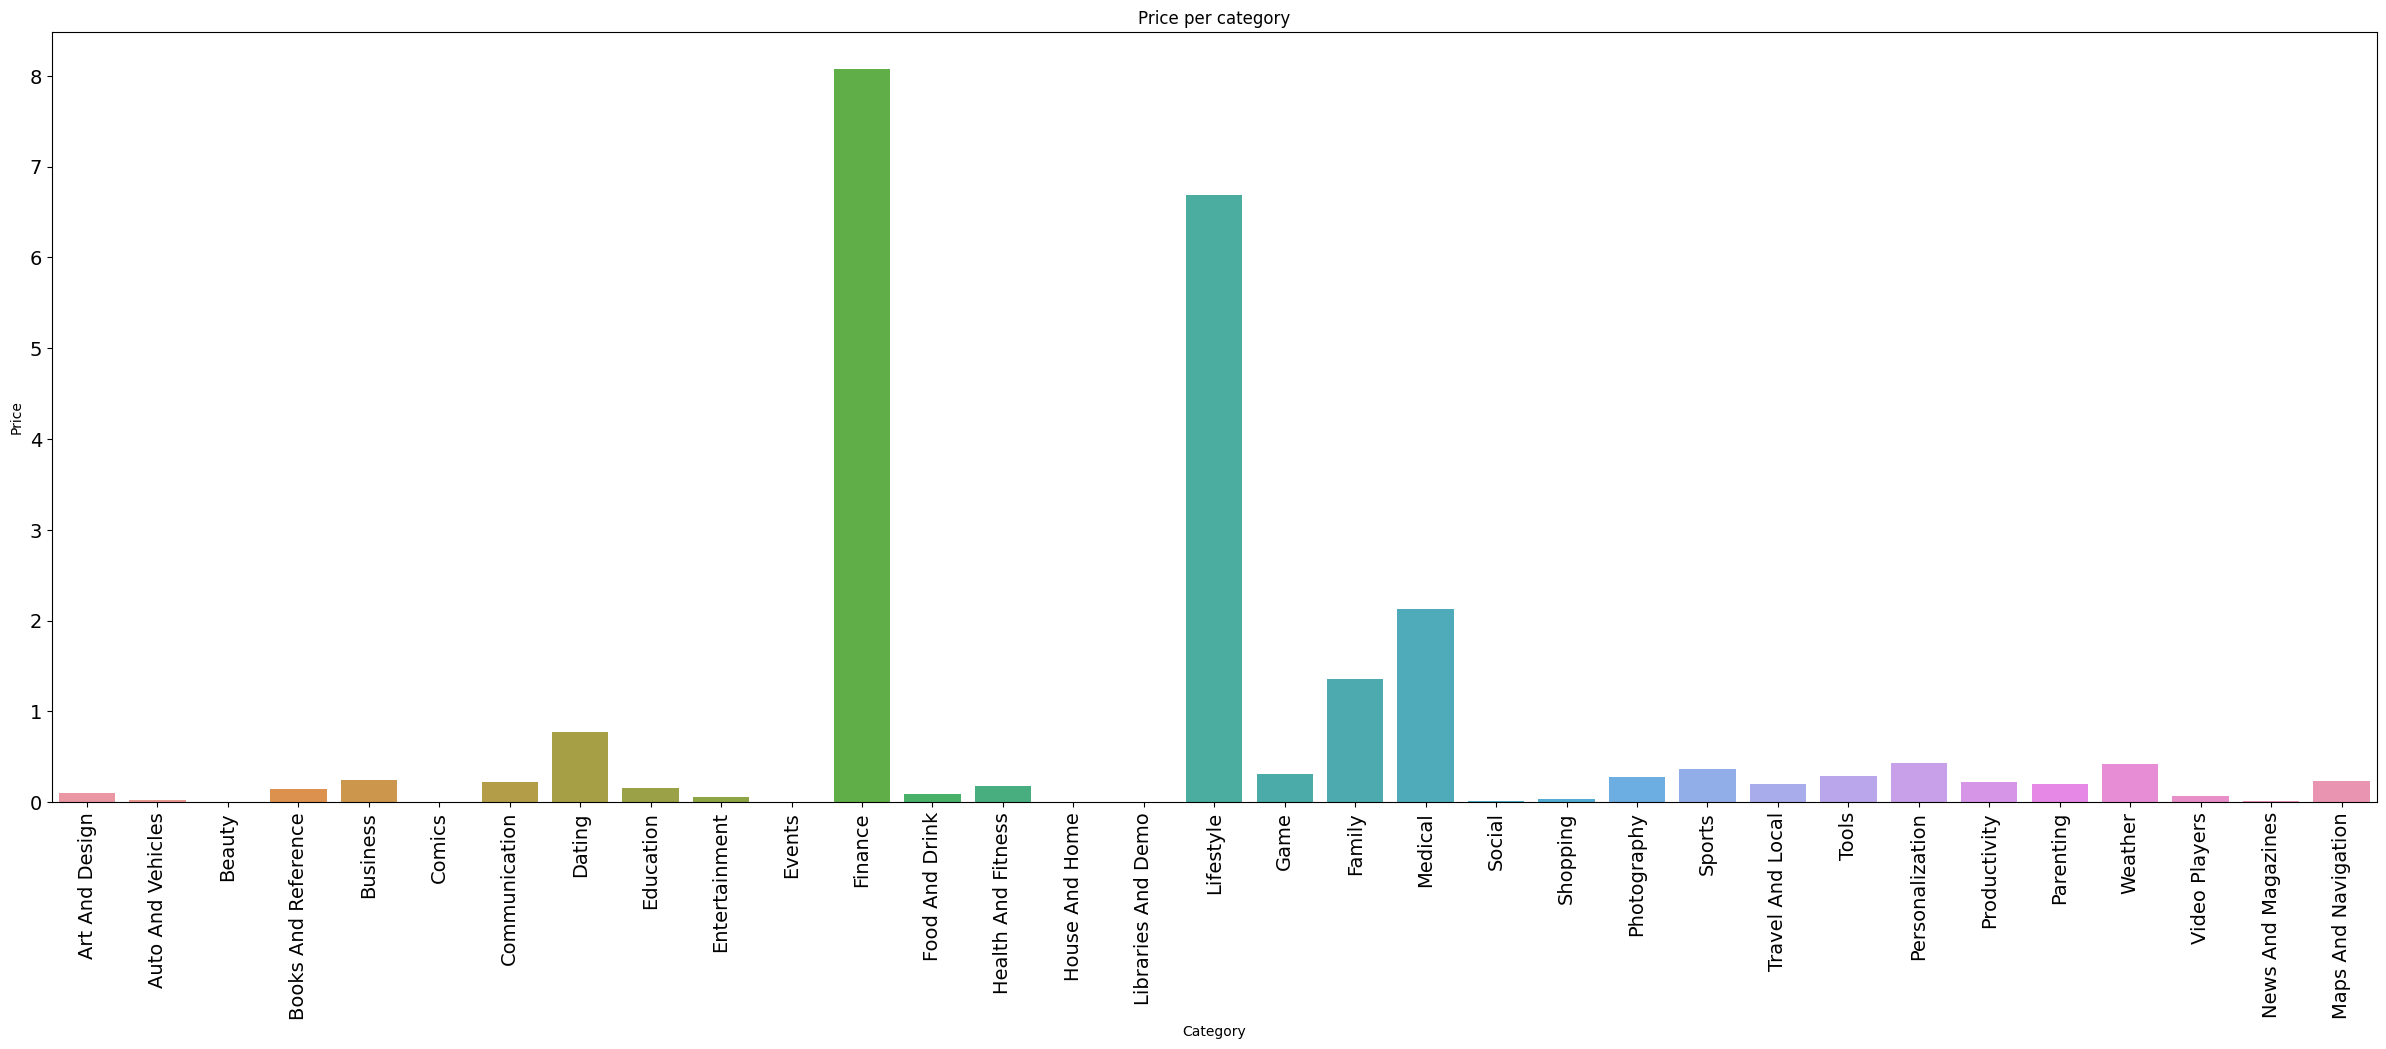

In [40]:
plt.figure(figsize=(30, 10))
plt.title('Price per category');
plt.xticks(rotation = 90, fontsize=14);
plt.yticks(fontsize=14);
sns.barplot(x='Category', y='Price', data=df_no_nan, errorbar = None);

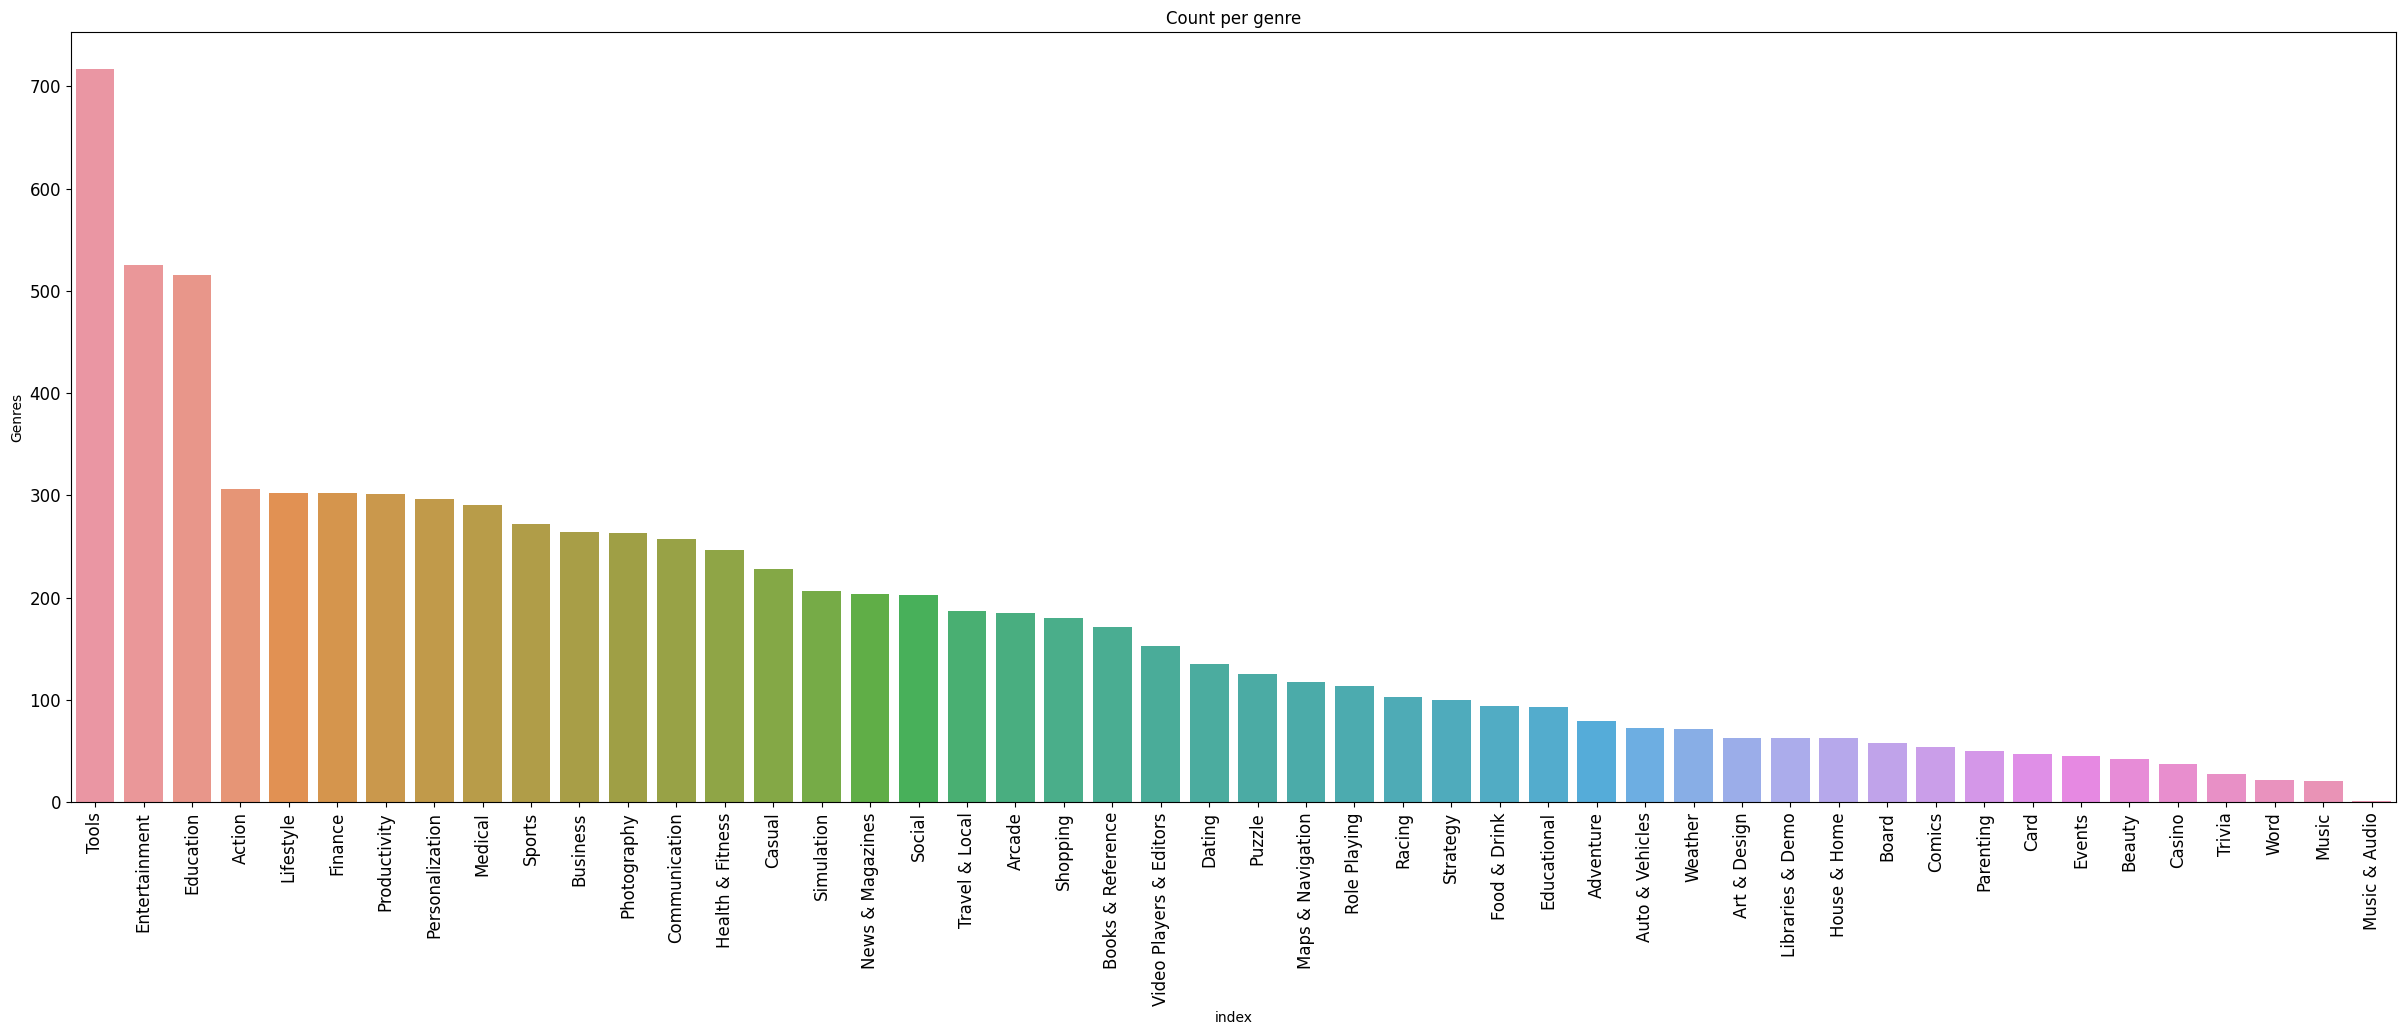

In [41]:
plt.figure(figsize=(30, 10))
plt.title('Count per genre');
plt.xticks(rotation = 90, fontsize=12);
plt.yticks(fontsize=12)
sns.barplot(y=df['Genres'].value_counts().reset_index()['Genres'], x=df['Genres'].value_counts().reset_index()[:]['index']);

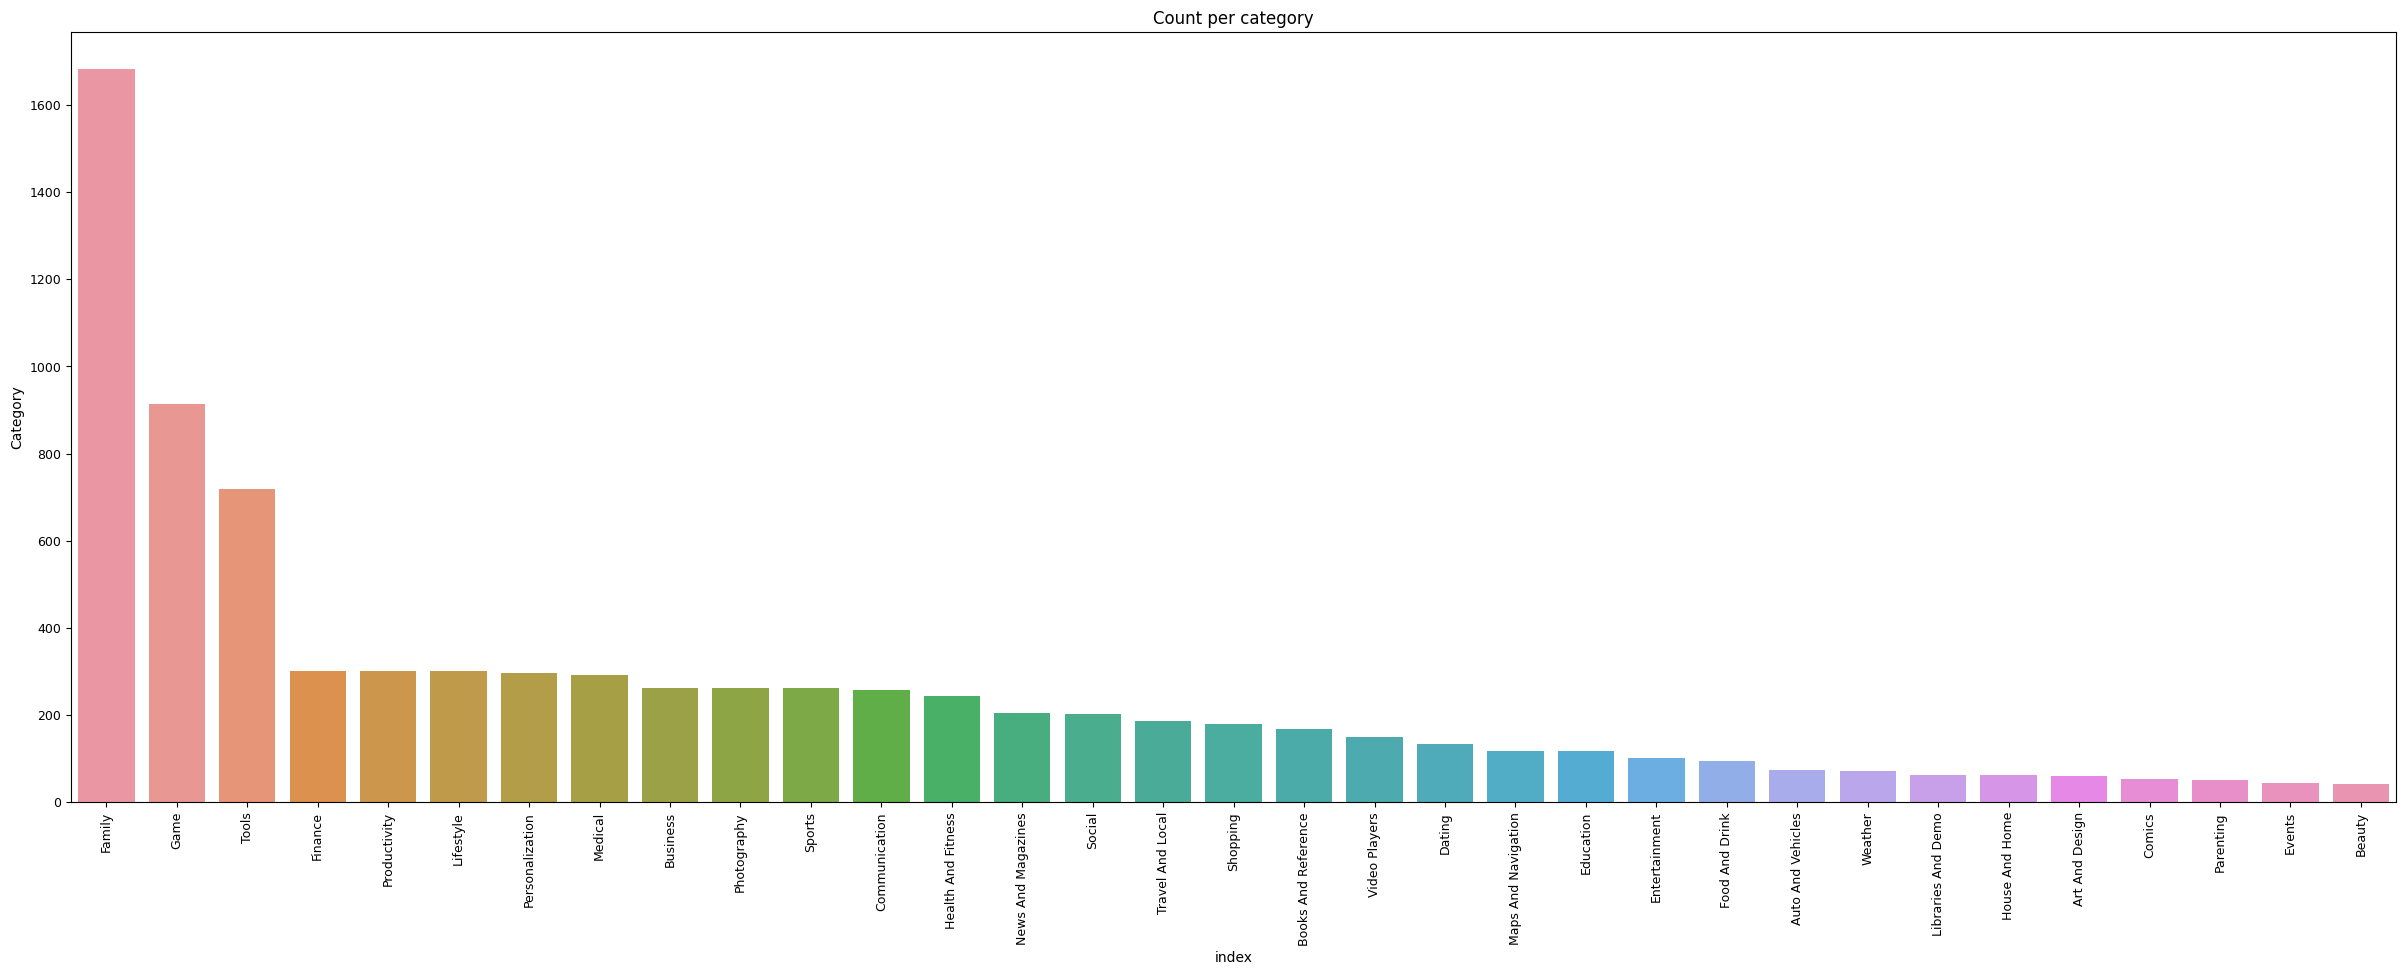

In [42]:
plt.figure(figsize=(30,10))
plt.title('Count per category');
plt.xticks(rotation = 90, fontsize=9);
plt.yticks(fontsize=9);
sns.barplot(y=df['Category'].value_counts().reset_index()['Category'], x=df['Category'].value_counts().reset_index()['index']);

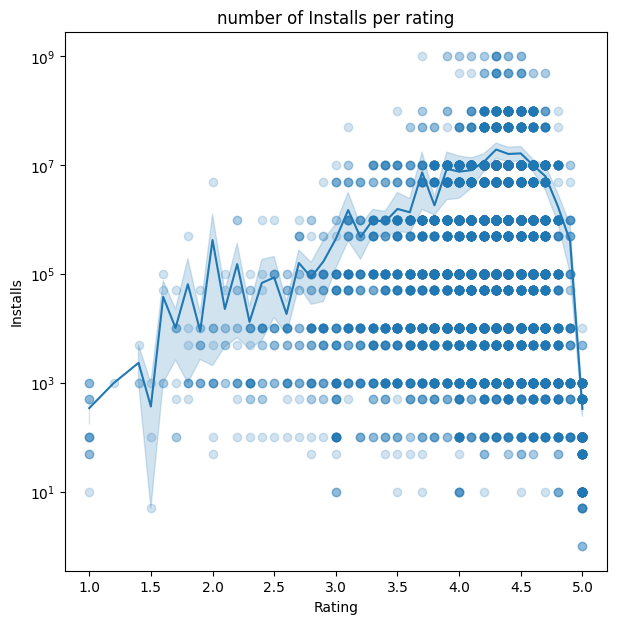

In [43]:
plt.figure(figsize=(7,7))
plt.title('number of Installs per rating')
plt.scatter( x=df_no_nan['Rating'], y=df_no_nan['Installs'], alpha = 0.2)
sns.lineplot(x="Rating", y="Installs", data=df_no_nan)
plt.yscale('log')

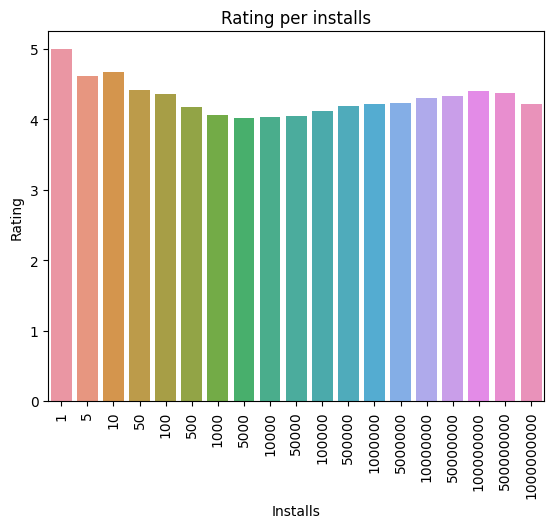

In [45]:
sns.barplot(x='Installs', y='Rating', data=df_no_nan, errorbar = None);
plt.title('Rating per installs');
plt.xticks(rotation = 90);

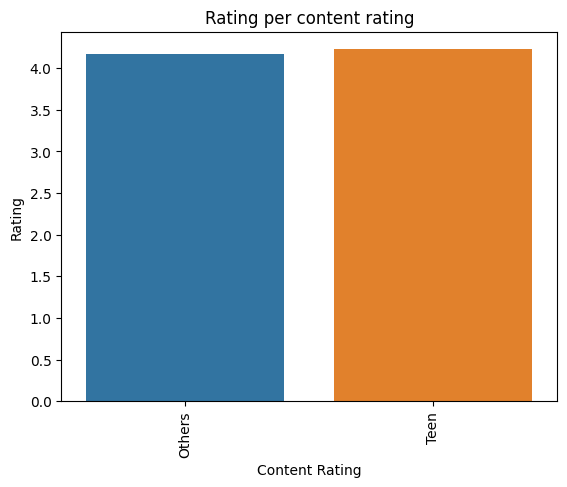

In [46]:
sns.barplot(x='Content Rating', y='Rating', data=df_no_nan, errorbar = None);
plt.title('Rating per content rating');
plt.xticks(rotation = 90);

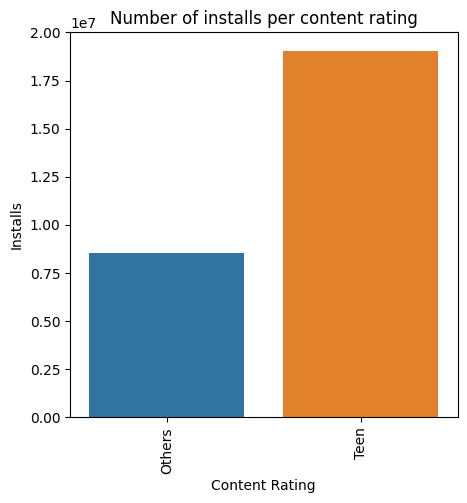

In [48]:
plt.figure(figsize=(5,5))
plt.title('Number of installs per content rating')
sns.barplot(y="Installs", x="Content Rating", data=df_no_nan, errorbar=None)
plt.xticks(rotation = 90);

Text(0.5, 1.0, 'Rating VS Installs')

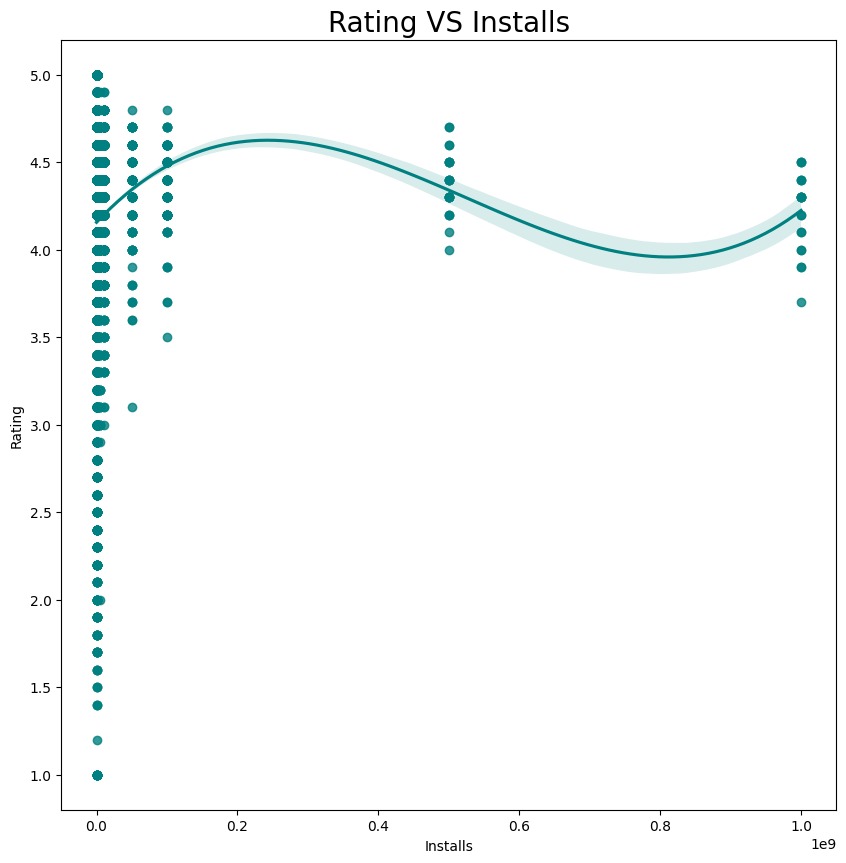

In [50]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=df_no_nan, order=3);
plt.title('Rating VS Installs',size = 20)

In [52]:
df_no_nan.head()

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres,num_Installs,Perc_Reviewed,cumul_Installs_per_price
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159.0,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design,None,1.590000,10000
1,1,1,Coloring book moana,Art And Design,3.9,967.0,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design,None,0.193400,510000
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510.0,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design,None,1.750200,5510000
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design,None,0.431288,55510000
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967.0,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design,None,0.967000,55610000


In [54]:
df_no_nan.drop(['App','Installs','Type','Last Updated','Current Ver','Minimum Android Ver'], axis=1, inplace = True)

In [55]:
df_no_nan['Size'].unique()

array([1.9000e+01, 1.4000e+01, 8.7000e+00, 2.5000e+01, 2.8000e+00,
       5.6000e+00, 2.9000e+01, 3.3000e+01, 3.1000e+00, 2.8000e+01,
       1.2000e+01, 2.0000e+01, 2.1000e+01, 3.7000e+01, 5.5000e+00,
       1.7000e+01, 3.9000e+01, 3.1000e+01, 4.2000e+00, 2.3000e+01,
       6.0000e+00, 6.1000e+00, 4.6000e+00, 9.2000e+00, 5.2000e+00,
       1.1000e+01, 2.4000e+01, 1.0000e+00, 9.4000e+00, 1.5000e+01,
       1.0000e+01, 1.2000e+00, 2.6000e+01, 8.0000e+00, 7.9000e+00,
       5.6000e+01, 5.7000e+01, 3.5000e+01, 5.4000e+01, 1.9629e-01,
       3.6000e+00, 5.7000e+00, 8.6000e+00, 2.4000e+00, 2.7000e+01,
       2.7000e+00, 2.5000e+00, 7.0000e+00, 1.6000e+01, 3.4000e+00,
       8.9000e+00, 3.9000e+00, 2.9000e+00, 3.8000e+01, 3.2000e+01,
       5.4000e+00, 1.8000e+01, 1.1000e+00, 2.2000e+00, 4.5000e+00,
       9.8000e+00, 5.2000e+01, 9.0000e+00, 6.7000e+00, 3.0000e+01,
       2.6000e+00, 7.1000e+00, 2.2000e+01, 6.4000e+00, 3.2000e+00,
       4.9000e+00, 9.5000e+00, 5.0000e+00, 5.9000e+00, 1.3000e

In [56]:
df_no_nan['Size'] = df_no_nan['Size']*1000000

In [57]:
df_no_nan['Size'].unique()

array([1.9000e+07, 1.4000e+07, 8.7000e+06, 2.5000e+07, 2.8000e+06,
       5.6000e+06, 2.9000e+07, 3.3000e+07, 3.1000e+06, 2.8000e+07,
       1.2000e+07, 2.0000e+07, 2.1000e+07, 3.7000e+07, 5.5000e+06,
       1.7000e+07, 3.9000e+07, 3.1000e+07, 4.2000e+06, 2.3000e+07,
       6.0000e+06, 6.1000e+06, 4.6000e+06, 9.2000e+06, 5.2000e+06,
       1.1000e+07, 2.4000e+07, 1.0000e+06, 9.4000e+06, 1.5000e+07,
       1.0000e+07, 1.2000e+06, 2.6000e+07, 8.0000e+06, 7.9000e+06,
       5.6000e+07, 5.7000e+07, 3.5000e+07, 5.4000e+07, 1.9629e+05,
       3.6000e+06, 5.7000e+06, 8.6000e+06, 2.4000e+06, 2.7000e+07,
       2.7000e+06, 2.5000e+06, 7.0000e+06, 1.6000e+07, 3.4000e+06,
       8.9000e+06, 3.9000e+06, 2.9000e+06, 3.8000e+07, 3.2000e+07,
       5.4000e+06, 1.8000e+07, 1.1000e+06, 2.2000e+06, 4.5000e+06,
       9.8000e+06, 5.2000e+07, 9.0000e+06, 6.7000e+06, 3.0000e+07,
       2.6000e+06, 7.1000e+06, 2.2000e+07, 6.4000e+06, 3.2000e+06,
       4.9000e+06, 9.5000e+06, 5.0000e+06, 5.9000e+06, 1.3000e

In [65]:
df_no_nan.select_dtypes(include=['object']).columns

Index(['Category', 'Content Rating', 'Genres', 'num_Installs'], dtype='object')

In [67]:
df_no_nan.drop('num_Installs',axis = 1)

,Unnamed: 0.1,Unnamed: 0,Category,Rating,Reviews,Size,Price,Content Rating,Genres,Perc_Reviewed,cumul_Installs_per_price
0,0,0,Art And Design,4.1,159.0,19000000.0,0.0,Others,Art & Design,1.590000,10000
1,1,1,Art And Design,3.9,967.0,14000000.0,0.0,Others,Art & Design,0.193400,510000
2,2,5,Art And Design,4.7,87510.0,8700000.0,0.0,Others,Art & Design,1.750200,5510000
3,3,6,Art And Design,4.5,215644.0,25000000.0,0.0,Teen,Art & Design,0.431288,55510000
4,4,7,Art And Design,4.3,967.0,2800000.0,0.0,Others,Art & Design,0.967000,55610000
...,...,...,...,...,...,...,...,...,...,...,...
8270,8270,8911,Books And Reference,4.8,44.0,604490.0,0.0,Others,Books & Reference,4.400000,77434922936
8271,8271,8912,Family,4.0,7.0,2600000.0,0.0,Others,Education,1.400000,77434923436
8272,8272,8913,Family,4.5,38.0,53000000.0,0.0,Others,Education,0.760000,77434928436
8273,8273,8914,Family,5.0,4.0,3600000.0,0.0,Others,Education,4.000000,77434928536


In [68]:
df_no_nan.select_dtypes(include=['object']).columns

Index(['Category', 'Content Rating', 'Genres', 'num_Installs'], dtype='object')

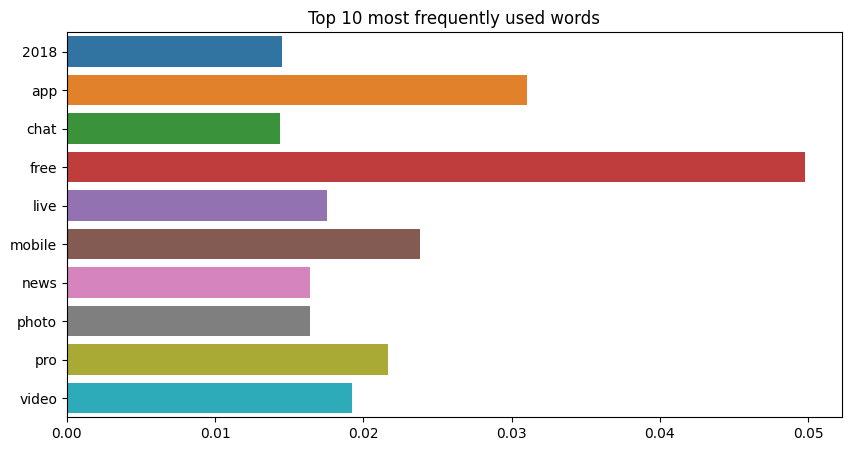

In [75]:
model = CountVectorizer(max_features=10, stop_words='english')
X = model.fit_transform(list(df['App']))
#vectorizer = CountVectorizer()
plt.figure(figsize=(10,5))
plt.title('Top 10 most frequently used words')
sns.barplot(x=X.toarray().mean(axis=0), y=model.get_feature_names_out());

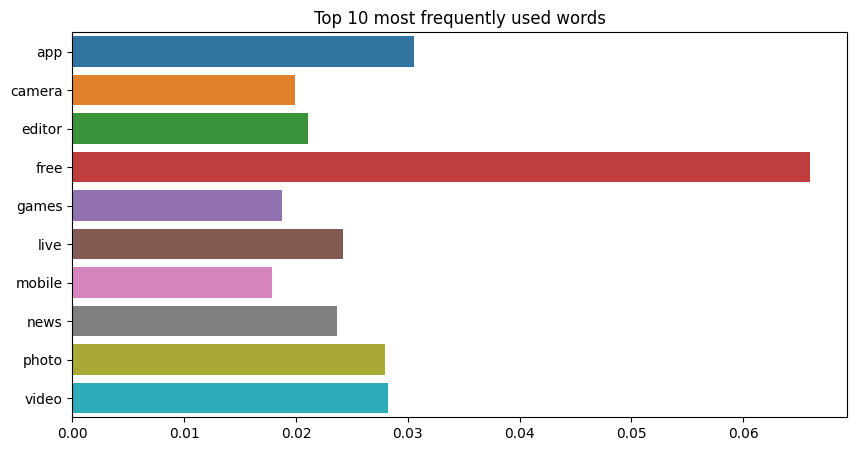

In [76]:
X = model.fit_transform(list(df[df['Installs']>=1000000]['App']))

plt.figure(figsize=(10,5))
plt.title('Top 10 most frequently used words')
sns.barplot(x=X.toarray().mean(axis=0), y=model.get_feature_names_out());